<a href="https://colab.research.google.com/github/NK-Mikey/Data_Analysis/blob/main/Predicting%20Bank%20Customer%20Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting Bank Customer Churn Using Machine Learning Models**

Customer churn continues to be a critical challenge in the banking industry, directly impacting revenue, customer lifetime value, and overall profitability. Since retaining existing customers is generally more cost-effective than acquiring new ones, banks must identify early indicators of dissatisfaction to prevent churn. This project addresses that need by developing machine learning models that can classify whether a customer is likely to leave based on historical account data and demographic attributes. Specifically, the project has three key objectives: first, to build and evaluate three supervised learning models including Logistic Regression, Decision Tree, and Random Forest to predict churn; second, to identify the most influential features that drive customer churn decisions, using model-based insights such as feature importance and coefficients; and third, to explore how demographic factors like gender, geography and age correlate with churn behavior. Together, these efforts aim to provide banks with actionable, data-driven insights that support targeted customer retention strategies.

## 1. Import Libraries

In [135]:
#Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns

# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

## 2. Data Loading and Exploring

In [136]:
# Load the dataset
df = pd.read_csv('Churn_Modelling.csv')

# Preview the loaded dataset
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0


In [137]:
# To understand the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


In [138]:
# To check the basic descriptive statistics summary of the dataset
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10002.000000,1.000200e+04,10002.000000,10001.000000,10002.000000,10002.000000,10002.000000,10001.000000,10001.000000,10002.000000,10002.000000
mean,5001.499600,1.569093e+07,650.555089,38.922311,5.012498,76491.112875,1.530194,0.705529,0.514949,100083.331145,0.203759
std,2887.472338,7.193177e+04,96.661615,10.487200,2.891973,62393.474144,0.581639,0.455827,0.499801,57508.117802,0.402812
min,1.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2501.250000,1.562852e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50983.750000,0.000000
50%,5001.500000,1.569073e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100185.240000,0.000000
75%,7501.750000,1.575323e+07,718.000000,44.000000,7.000000,127647.840000,2.000000,1.000000,1.000000,149383.652500,0.000000
max,10000.000000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [139]:
# To check the missing values
df.isnull().sum().to_frame('Missing Values').transpose()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Missing Values,0,0,0,0,1,0,1,0,0,0,1,1,0,0


## 3. Data Cleaning

### 3.1 Handling Missing Values

In [140]:
# Drop the missing values
df.dropna(inplace=True)

# Confirm no of missing values
df.isnull().sum().to_frame('Missing Values').transpose()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Missing Values,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [141]:
# Shape after dropping values
print("No of Rows & Column after dropping missing values", df.shape)

No of Rows & Column after dropping missing values (9998, 14)


### 3.2 Removing Unnecessary Columns

In [142]:
# # Drop irrelevant columns
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

# Preview after dropping
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
5,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1


## 4. Feature Selection

In [143]:
# Split features and target
X = df.drop('Exited', axis=1)
y = df['Exited']

## 5. Split Train and Test set

In [144]:
# Split train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=26)

## 6. Data Preprocessing

### 6.1 Standardizing Numerical Features

In [145]:
# Select numerical features
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Standardize numerical features
scaler = StandardScaler()
X_train_num = scaler.fit_transform(X_train[numerical_features])
X_test_num = scaler.transform(X_test[numerical_features])

### 6.2 Encoding Categorical Features

In [146]:
# Select categorical features
categorical_features = ['Geography', 'Gender']

# One-hot encode categorical features
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_train_cat = encoder.fit_transform(X_train[categorical_features])
X_test_cat = encoder.transform(X_test[categorical_features])
encoded_cat_cols = encoder.get_feature_names_out(categorical_features)

### 6.3 Merging Scaled, Encoded and Binary Features

In [147]:
# Select the binary features as is (no scaling/encoding needed)
binary_features = ['HasCrCard', 'IsActiveMember']

# Extract them from the original train/test sets
X_train_binary = X_train[binary_features].values
X_test_binary = X_test[binary_features].values

# Now concatenate scaled numerical, encoded categorical, and these binary features
X_train_processed = np.hstack([X_train_num, X_train_cat, X_train_binary])
X_test_processed = np.hstack([X_test_num, X_test_cat, X_test_binary])

# Update columns list accordingly
final_columns = numerical_features + list(encoded_cat_cols) + binary_features

# Convert to DataFrame
X_train_final = pd.DataFrame(X_train_processed, columns=final_columns)
X_test_final = pd.DataFrame(X_test_processed, columns=final_columns)

# Reset indices to match y
X_train_final.index = X_train.index
X_test_final.index = X_test.index

### 6.4 Balancing Target Variable

In [148]:
# Balance classes with SMOTE
smote = SMOTE(random_state=26)
X_train_bal, y_train_bal = smote.fit_resample(X_train_final, y_train)

## 7. Training Logistics Regression, Decision Tree and Random Forest

In [149]:
# Initialize models with common random state
models = {
    "Logistic Regression": LogisticRegression(random_state=26),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=26),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=8, random_state=26)
}

# Train all models
for name, model in models.items():
    model.fit(X_train_bal, y_train_bal)
    print(f"{name} trained successfully.")

Logistic Regression trained successfully.
Decision Tree trained successfully.
Random Forest trained successfully.


## 8. Evaluate the Models

In [150]:
# Initialize dictionary to store results
metrics = {}

for name, model in models.items():
    print(f"\n Evaluating: {name}")
    print("-" * 60)

    y_pred = model.predict(X_test_final)
    y_prob = model.predict_proba(X_test_final)[:, 1]

    cm = confusion_matrix(y_test, y_pred)
    print(" Confusion Matrix:")
    print(cm)

    clf_report = classification_report(y_test, y_pred, digits=4, output_dict=True)
    print("\n Classification Report:")
    print(classification_report(y_test, y_pred, digits=4))

    auc = roc_auc_score(y_test, y_prob)
    print(f"\n ROC-AUC Score: {auc:.4f}")
    print("=" * 60)

    # Store required metrics for visualization
    metrics[name] = {
        'conf_matrix': cm,
        'precision_macro': clf_report['macro avg']['precision'],
        'recall_macro': clf_report['macro avg']['recall'],
        'f1_macro': clf_report['macro avg']['f1-score'],
        'roc_auc': auc
    }


 Evaluating: Logistic Regression
------------------------------------------------------------
 Confusion Matrix:
[[1729  659]
 [ 172  440]]

 Classification Report:
              precision    recall  f1-score   support

           0     0.9095    0.7240    0.8062      2388
           1     0.4004    0.7190    0.5143       612

    accuracy                         0.7230      3000
   macro avg     0.6549    0.7215    0.6603      3000
weighted avg     0.8057    0.7230    0.7467      3000


 ROC-AUC Score: 0.7825

 Evaluating: Decision Tree
------------------------------------------------------------
 Confusion Matrix:
[[1893  495]
 [ 200  412]]

 Classification Report:
              precision    recall  f1-score   support

           0     0.9044    0.7927    0.8449      2388
           1     0.4542    0.6732    0.5425       612

    accuracy                         0.7683      3000
   macro avg     0.6793    0.7330    0.6937      3000
weighted avg     0.8126    0.7683    0.7832      30

## 9. Visualization

### 9.1 HeatMap of Confusion Matrix

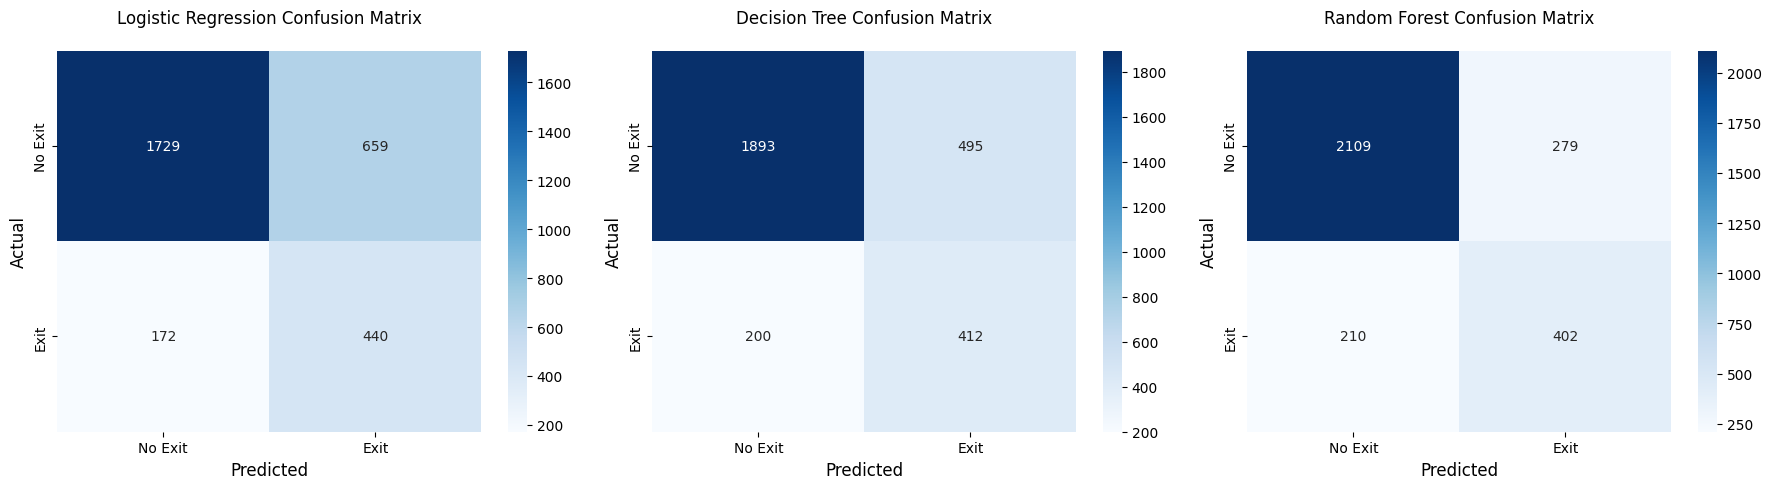

In [151]:
# Extract the list of model names from the metrics dictionary keys
models_list = list(metrics.keys())

# Plot confusion matrices
fig, axes = plt.subplots(1, len(models_list), figsize=(6 * len(models_list), 5))
if len(models_list) == 1:
    axes = [axes]

for ax, model in zip(axes, models_list):
    cm = metrics[model]['conf_matrix']
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f"{model} Confusion Matrix", pad=20)
    ax.set_xlabel('Predicted', fontsize=12)
    ax.set_ylabel('Actual', fontsize=12)
    ax.xaxis.set_ticklabels(['No Exit', 'Exit'])
    ax.yaxis.set_ticklabels(['No Exit', 'Exit'])

plt.tight_layout()
plt.show()

# **Confusion Matrix Interpretation**

### **Logistic Regression**

This model correctly identified 1729 non-churners (True Negatives) and 440 churners (True Positives). However, it also misclassified 659 churners as non-churners (False Negatives) and 172 non-churners as churners (False Positives).

- The accuracy is 72.3%, indicating the model performs reasonably well overall.

- The recall for churners (class 1) is 71.9%, showing it captures most churners but with moderate precision (40.0%), meaning a high number of false positives.

- The ROC-AUC score of 0.7825 reflects decent class separability, though there's room for improvement in precision and overall balance.

### **Decision Tree**

This model improves on Logistic Regression by correctly predicting 1893 non-churners and 412 churners, with fewer false negatives (200) but still a sizable number of false positives (495).

- The overall accuracy improves to 76.8%.

- Recall for churners increases to 67.3%, and precision to 45.4%, suggesting it detects churn better while maintaining more balanced performance.

- The ROC-AUC score of 0.8272 indicates better discrimination between churners and non-churners compared to Logistic Regression.

### **Random Forest**

This model outperforms the others with 2109 correct non-churn predictions and 402 correct churn predictions, keeping both false positives (279) and false negatives (210) relatively low.

- It achieves the highest accuracy at 83.7%.

- It strikes the best balance with precision (59.0%) and recall (65.7%) for churners, resulting in a solid f1-score of 62.2%.

- The ROC-AUC score of 0.8619 confirms strong model performance in classifying churn and non-churn customers.

### **Summary:**

While Logistic Regression offers decent recall for churners, it struggles with precision. Decision Tree improves balance but still misclassifies many. Random Forest provides the best trade-off between sensitivity and specificity, making it the most reliable model for deployment.

### 9.2 Metric Comparison of Each Models

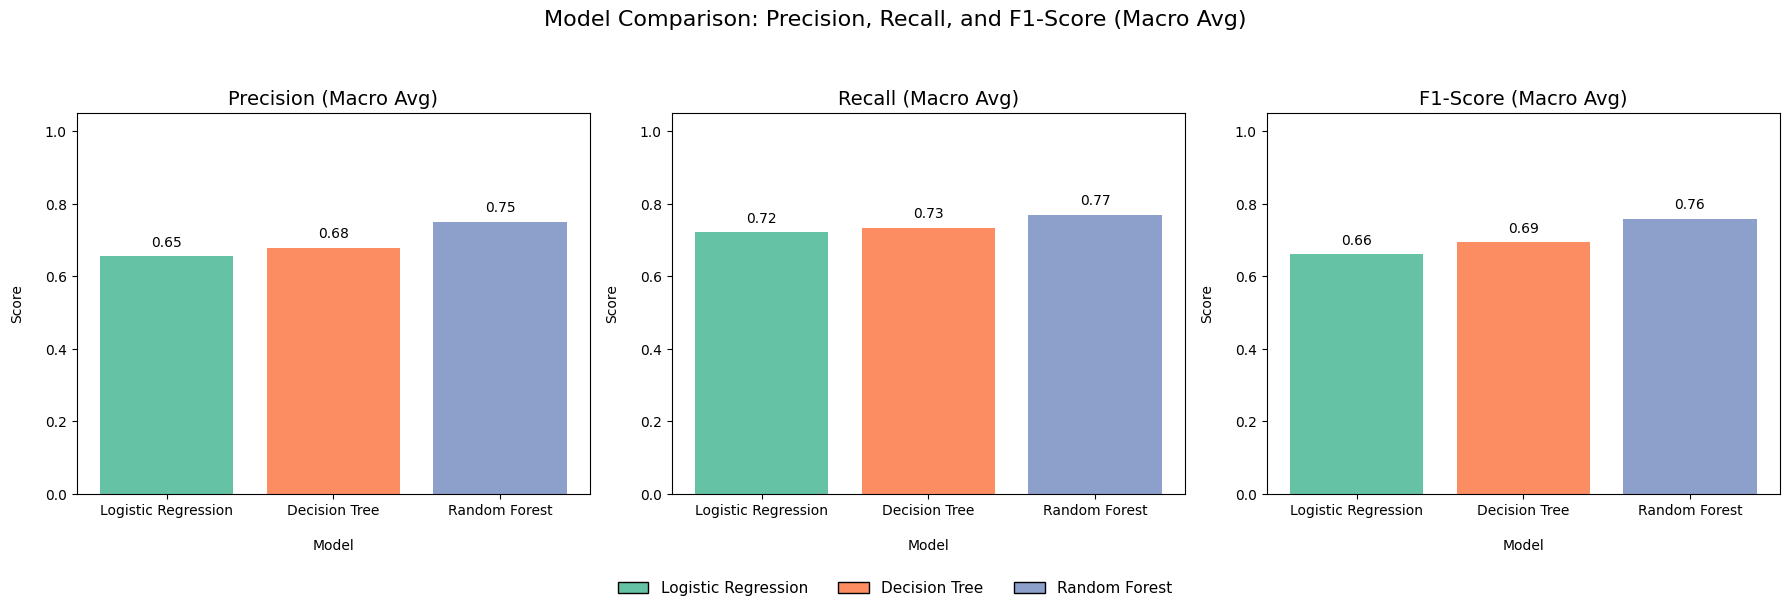

In [152]:
# Model names
models_list = list(metrics.keys())

# Extract macro metrics
precision = [metrics[m]['precision_macro'] for m in models_list]
recall = [metrics[m]['recall_macro'] for m in models_list]
f1 = [metrics[m]['f1_macro'] for m in models_list]

# Plot setup
metric_data = {
    "Precision (Macro Avg)": precision,
    "Recall (Macro Avg)": recall,
    "F1-Score (Macro Avg)": f1
}

# Assign unique color per model
model_colors = sns.color_palette("Set2", len(models_list))
x = np.arange(len(models_list))

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for ax, (metric_name, values) in zip(axes, metric_data.items()):
    bars = ax.bar(x, values, color=model_colors)
    ax.set_title(metric_name, fontsize=14)
    ax.set_xticks(x)
    ax.set_xticklabels(models_list)
    ax.set_ylim(0, 1.05)
    ax.set_ylabel("Score", labelpad=15)
    ax.set_xlabel("Model", labelpad=15)
    ax.grid(False)

    # Add value labels on top of bars
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f"{height:.2f}",
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

# Create synced legend manually
legend_handles = [Patch(facecolor=color, edgecolor='black', label=model)
                  for model, color in zip(models_list, model_colors)]
fig.legend(handles=legend_handles, loc='lower center', ncol=len(models_list),
           fontsize=11, bbox_to_anchor=(0.5, -0.02), frameon=False)

fig.suptitle("Model Comparison: Precision, Recall, and F1-Score (Macro Avg)", fontsize=16)
plt.tight_layout(rect=[0, 0.05, 1, 0.93])
plt.show()

# **Model Performance Metrics Comparison**

### **Logistic Regression**

- **Macro Precision (0.6549)**: On average, the model’s ability to correctly identify each class (churn and no churn) is moderate, with noticeable disparity in performance between classes.

- **Macro Recall (0.7215)**: The model captures a decent proportion of both classes, especially churned customers, though not perfectly.

- **Macro F1-Score (0.6603)**: Overall balance between precision and recall is limited, reflecting the model’s struggle with class imbalance, especially in predicting churn accurately.

### **Decision Tree**

- **Macro Precision (0.6793)**: Slightly improved average precision across classes compared to logistic regression, meaning better class-wise prediction reliability.

- **Macro Recall (0.7330)**: Higher than logistic regression, indicating the model is better at detecting both churned and retained customers.

- **Macro F1-Score (0.6937)**: Improved overall balance, suggesting a more consistent performance across classes.

### **Random Forest**

- **Macro Precision (0.7499)**: Best among all models, indicating the highest average accuracy in positive predictions for both classes.

- **Macro Recall (0.7700)**: Also the highest, showing that the model captures the majority of actual class instances effectively.

- **Macro F1-Score (0.7590)**: Indicates the best overall performance and balance between precision and recall, making Random Forest the most reliable classifier across both churn and non-churn groups.

### 9.3 ROC Curve Comparison

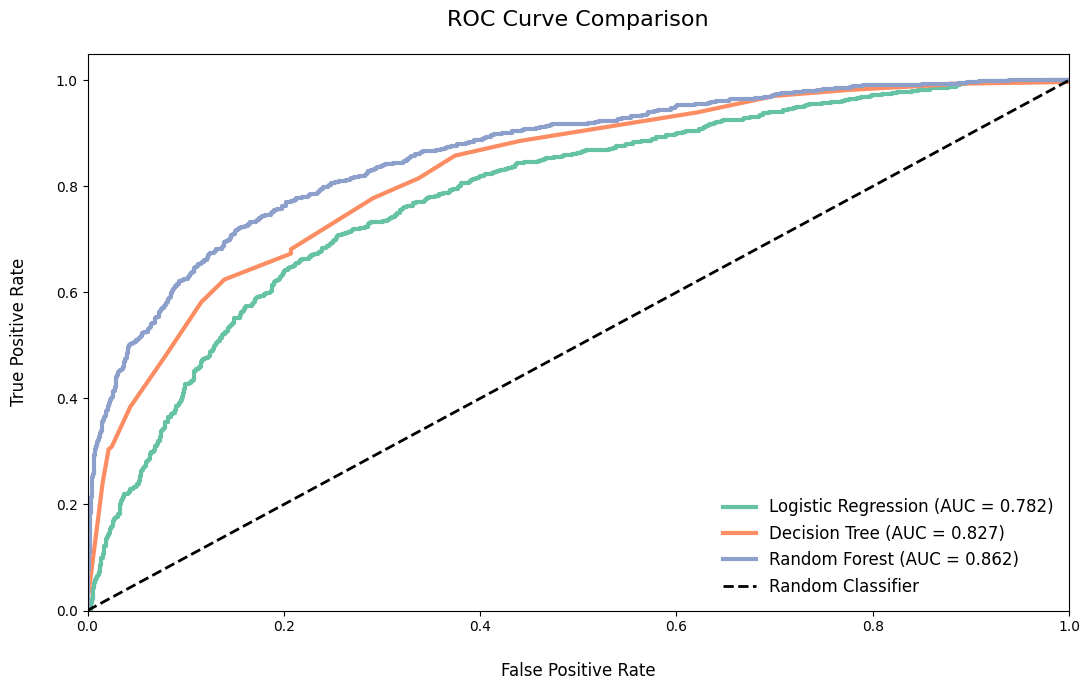

In [153]:
# Generate the color palette based on number of models
model_colors = sns.color_palette("Set2", len(models_list))

plt.figure(figsize=(11, 7))

# Iterate through models and corresponding colors
for (name, model), color in zip(models.items(), model_colors):
    y_prob = model.predict_proba(X_test_final)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, lw=3, label=f"{name} (AUC = {auc_score:.3f})", color=color)

# Plot the random classifier line in black dashed
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Classifier')

# Axis labels and title
plt.xlabel("False Positive Rate", fontsize=12, labelpad=20)
plt.ylabel("True Positive Rate", fontsize=12, labelpad=20)
plt.title("ROC Curve Comparison", fontsize=16, pad=20)

# Font size for ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Set axis limits
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

# Legend styling
plt.legend(loc='lower right', fontsize=12, frameon=False)

# Disable grid for clean look
plt.grid(False)

plt.tight_layout()
plt.show()

# **ROC-AUC Interpretation**

The **ROC-AUC (Receiver Operating Characteristic - Area Under Curve)** score measures a model's ability to distinguish between the two classes — in this case, **churned** (1) vs **non-churned** (0) customers. A score of 1.0 indicates perfect separation, while 0.5 implies random guessing.


###  **Logistic Regression – ROC-AUC**: **0.7825**
- This score suggests that the Logistic Regression model has **moderate discriminative power**.
- It can correctly rank a randomly chosen churned customer higher than a non-churned one about **78% of the time**.
- While recall is relatively high for the churned class (0.719), precision is low (0.400), indicating many false positives.


### **Decision Tree – ROC-AUC:** **0.8272** *
- This model performs **better than Logistic Regression** in distinguishing between classes.
- AUC of 0.8272 indicates **stronger separation** between churned and non-churned customers.
- Both recall and precision improve slightly for the churned class compared to Logistic Regression.



### **Random Forest – ROC-AUC:** **0.8619**
- The highest AUC among all models, indicating **the best class-separating capability**.
- With a score of **0.8619**, the model can distinguish churned vs non-churned customers correctly in nearly **86% of random cases**.
- This aligns with its strong overall classification performance, making it the most reliable model for deployment in churn prediction.


### 9.4 Logistic Regression – Feature Importance

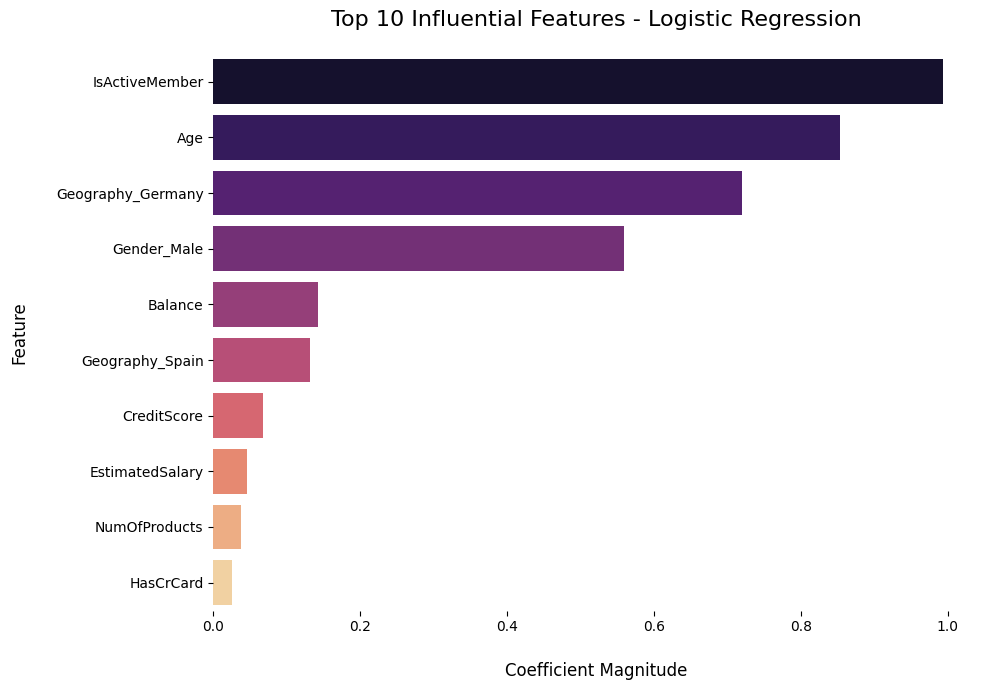

In [154]:
# Logistic Regression Coefficients
lr_coefficients = models["Logistic Regression"].coef_[0]
lr_importance_df = pd.DataFrame({
    'Feature': X_train_final.columns,
    'Coefficient': lr_coefficients,
    'Abs_Coefficient': np.abs(lr_coefficients)
}).sort_values(by='Abs_Coefficient', ascending=False)

# Plot
plt.figure(figsize=(10, 7))
sns.barplot(x='Abs_Coefficient', y='Feature', hue=lr_importance_df.head(10)['Feature'], data=lr_importance_df.head(10), palette='magma')
plt.title("Top 10 Influential Features - Logistic Regression", fontsize=16, pad=20)
plt.xlabel("Coefficient Magnitude", fontsize=12, labelpad=20)
plt.ylabel("Feature",fontsize=12, labelpad=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)


plt.grid(False)

plt.tight_layout()
plt.show()

# **Interpretation of Top Features from Logistic Regression**

The Logistic Regression model identifies **IsActiveMember**, **Age**, and **Geography (Germany)** as the most influential features in predicting customer churn. The coefficient for **IsActiveMember** is **-0.994**, which is the largest in absolute value, indicating that being an active member significantly reduces the likelihood of churn. In other words, inactive customers are much more likely to leave the bank.

**Age** has a positive coefficient of **0.854**, suggesting that older customers are more likely to churn. Similarly, customers located in **Germany** (Geography_Germany) have a positive coefficient of **0.720**, meaning they tend to have a higher churn probability compared to the reference geography category.

The feature **Gender_Male** has a negative coefficient (-0.559), implying that males are less likely to churn compared to females.

Other features such as **Balance** and **Geography_Spain** have smaller positive and negative coefficients respectively, indicating a mild effect on churn prediction. For instance, a higher account balance slightly increases the chance of churn, while customers from Spain are slightly less likely to churn.

Features like **CreditScore**, **EstimatedSalary**, **NumOfProducts**, **HasCrCard**, and **Tenure** have relatively small coefficients close to zero, meaning they have minimal influence on the model’s churn predictions.

Overall, this coefficient analysis helps highlight that customer activity status, age, and geographic location are the strongest drivers influencing churn risk in this dataset, as captured by the Logistic Regression model.


### 9.5 Decision Tree – Feature Importance

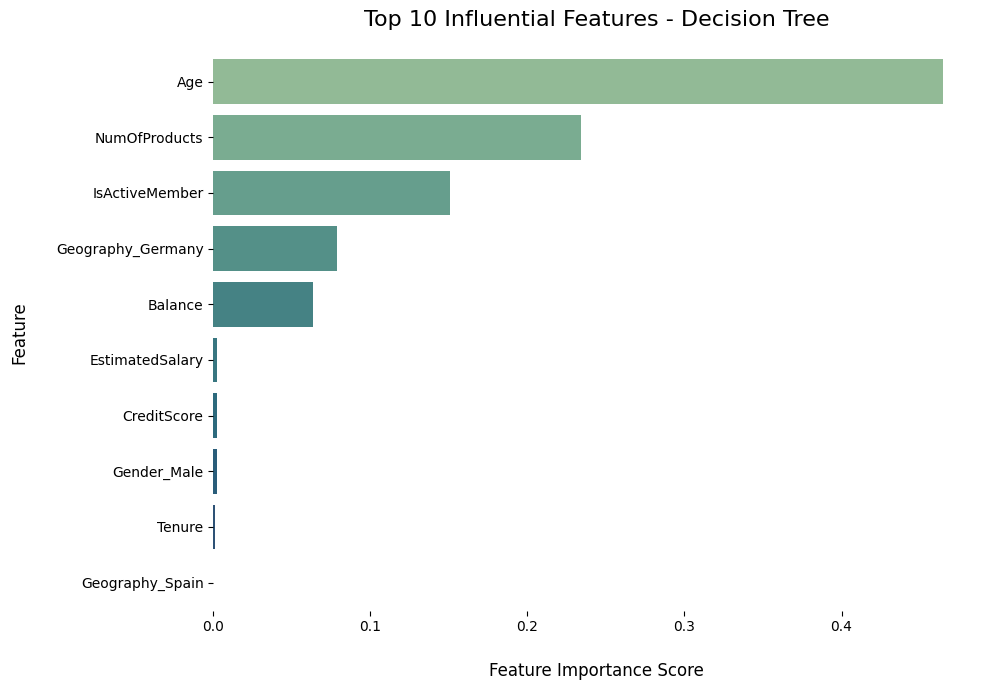

In [155]:
# Decision Tree Feature Importance
dt_importances = models["Decision Tree"].feature_importances_
dt_importance_df = pd.DataFrame({
    'Feature': X_train_final.columns,
    'Importance': dt_importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 7))
sns.barplot(x='Importance', y='Feature', hue=dt_importance_df.head(10)['Feature'],data=dt_importance_df.head(10), palette='crest', legend=False)
plt.title("Top 10 Influential Features - Decision Tree", fontsize=16, pad=20)
plt.xlabel("Feature Importance Score", fontsize=12, labelpad=20)
plt.ylabel("Feature", fontsize=12, labelpad=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)


plt.grid(False)
plt.tight_layout()
plt.show()

# **Interpretation of Top Features from Decision Tree**

The Decision Tree model highlights **Age**, **NumOfProducts**, and **IsActiveMember** as the most important features influencing customer churn predictions.

- **Age** is the most significant predictor, with an importance score of **0.465**, indicating that the customer's age strongly impacts the model's decision-making process. This suggests that age is a critical factor in distinguishing between customers who churn and those who stay.

- **NumOfProducts** has the second highest importance at **0.234**, showing that the number of products a customer holds with the bank plays a substantial role in predicting churn. Customers with multiple products may have different churn behaviors compared to those with fewer products.

- **IsActiveMember** ranks third with an importance of **0.151**, reinforcing the finding that customers actively engaged with the bank are less likely to churn.

Other features such as **Geography_Germany** (**0.079**) and **Balance** (**0.064**) also contribute to the model but to a lesser extent, suggesting that location and account balance influence churn but are less decisive than the top three features.

Features like **EstimatedSalary**, **CreditScore**, **Gender_Male**, **Tenure**, **Geography_Spain**, and **HasCrCard** have very low or zero importance scores, indicating minimal impact on the model’s predictions.

In summary, the Decision Tree model prioritizes customer age, product count, and activity status as key determinants of churn, aligning with intuitive business expectations and providing clear guidance for targeting retention efforts.


### 9.6 Random Forest – Feature Importance

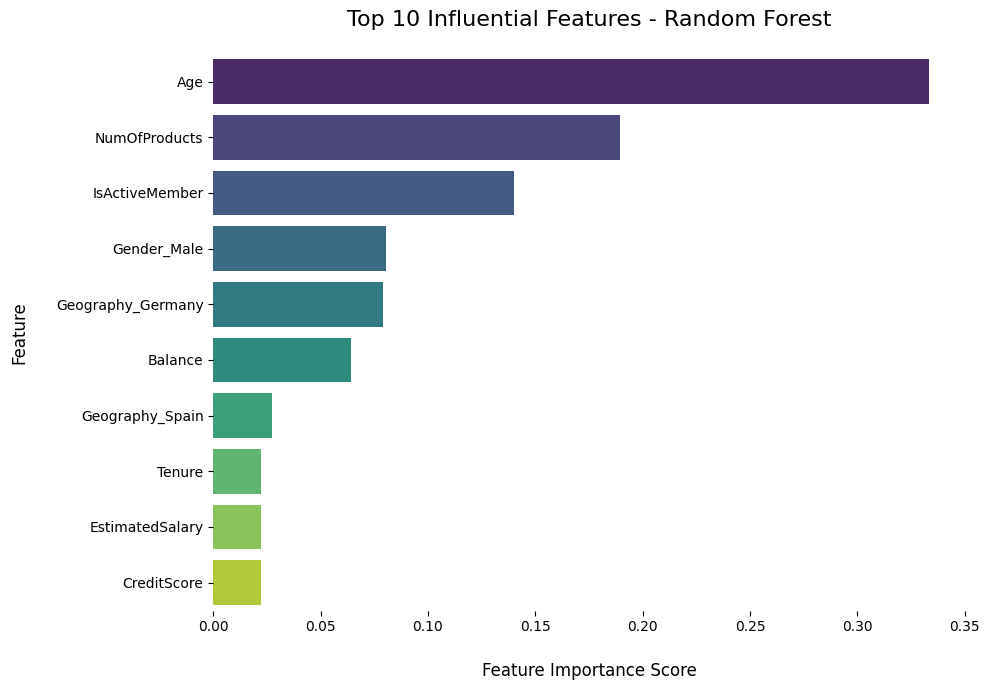

In [156]:
# Random Forest Feature Importance
rf_importances = models["Random Forest"].feature_importances_
rf_importance_df = pd.DataFrame({
    'Feature': X_train_final.columns,
    'Importance': rf_importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 7))
sns.barplot(x='Importance', y='Feature',hue=rf_importance_df.head(10)['Feature'], data=rf_importance_df.head(10), palette='viridis', legend=False)
plt.title("Top 10 Influential Features - Random Forest", fontsize=16, pad=20)
plt.xlabel("Feature Importance Score", fontsize=12, labelpad=20)
plt.ylabel("Feature", fontsize=12, labelpad=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)


plt.grid(False)
plt.tight_layout()
plt.show()

# **Interpretation of Top Features from Random Forest**

The Random Forest model identifies **Age**, **NumOfProducts**, and **IsActiveMember** as the most influential features for predicting customer churn.

- **Age** holds the highest importance with a score of **0.333**, indicating that it is the strongest predictor in the model. This underscores the significant role of customer age in churn behavior, with different age groups likely having varying propensities to leave the bank.

- **NumOfProducts** is the second most important feature at **0.189**, suggesting that the number of products a customer uses is a key factor in churn prediction. Customers managing multiple products may experience different satisfaction levels affecting their retention.

- **IsActiveMember** ranks third with an importance of **0.140**, highlighting that customers who are actively engaged with their accounts tend to have a lower risk of churn.

Additional features like **Gender_Male** (**0.080**), **Geography_Germany** (**0.079**), and **Balance** (**0.064**) also contribute noticeably, implying that gender, geographic location, and account balance are relevant but less dominant factors.

Features such as **Geography_Spain**, **Tenure**, **EstimatedSalary**, **CreditScore**, and **HasCrCard** have lower importance scores ranging roughly between 0.019 and 0.028, indicating these variables have minor influence on churn prediction within this model.

Overall, the Random Forest model emphasizes demographic and engagement-related attributes as critical in distinguishing churners, providing actionable insights to focus retention efforts on specific customer segments.


## 10. Churn Behaviour by Demographic Factors

### 10.1 Churn Rate by Gender

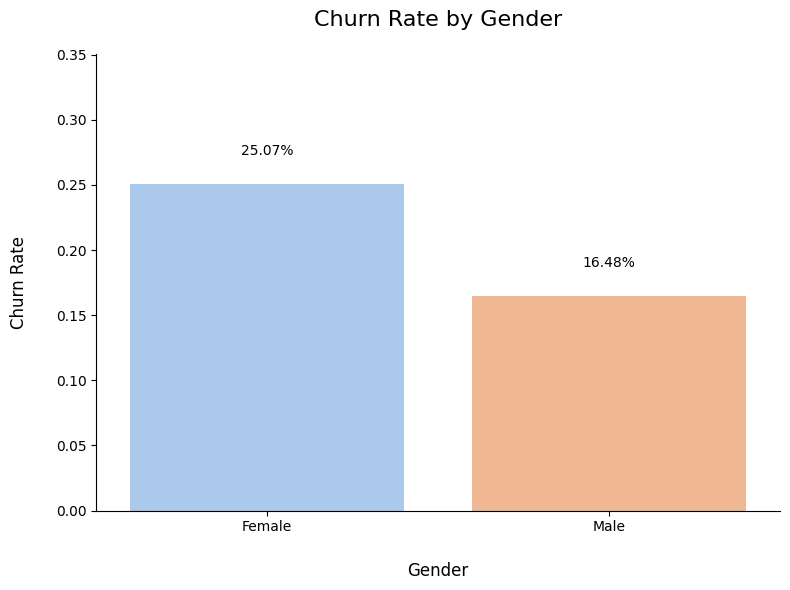

In [157]:
# Group by Gender and calculate churn rate
gender_churn = df.groupby('Gender')['Exited'].mean().reset_index()
gender_churn.columns = ['Gender', 'Churn Rate']
gender_churn['Churn Rate'] = gender_churn['Churn Rate'].round(4)

# Plot churn rate by Gender
plt.figure(figsize=(8, 6))
sns.barplot(data=gender_churn, x='Gender', y='Churn Rate', hue = 'Gender', palette='pastel', legend=False)

# Add title and labels with improved styling
plt.title('Churn Rate by Gender', fontsize=16, pad=20)
plt.xlabel('Gender', fontsize=12, labelpad=20)
plt.ylabel('Churn Rate', fontsize=12, labelpad=20)
plt.ylim(0, gender_churn['Churn Rate'].max() + 0.1)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(False)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)

# Annotate bars with churn rate values on top
for index, row in gender_churn.iterrows():
    plt.text(x=index, y=row['Churn Rate'] + 0.02, s=f"{row['Churn Rate']:.2%}",
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# **Interpretation of Churn Rate by Gender**

The churn rate analysis by gender reveals a notable difference between female and male customers. Female customers have a higher churn rate of approximately **25.07%**, meaning that about one in four female customers are likely to leave the bank. In contrast, the churn rate for male customers is significantly lower, at around **16.48%**, indicating that fewer males are leaving compared to females.

This disparity suggests that female customers may be at greater risk of churn, highlighting the importance of developing targeted retention strategies that address the specific needs and concerns of female clients. Understanding and addressing the factors contributing to higher churn among women could help improve overall customer retention.


### 10.2 Churn Rate by Location

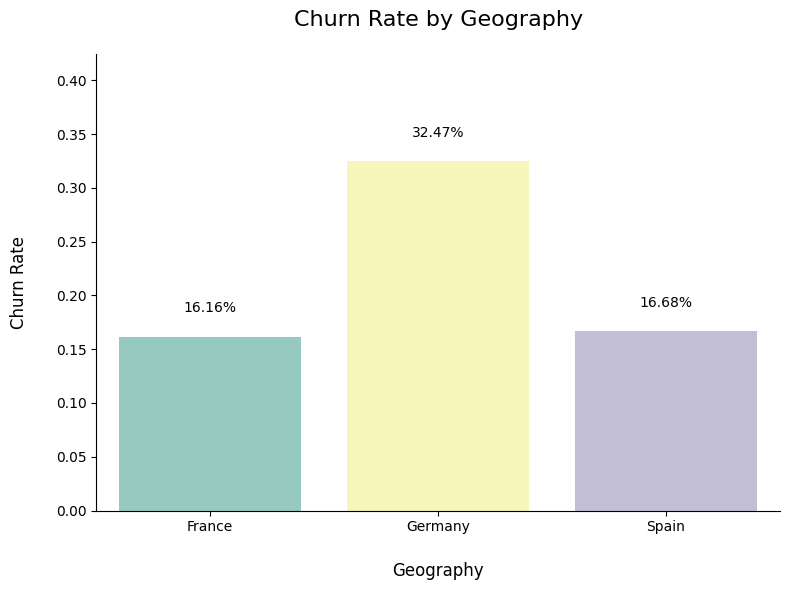

In [158]:
# Group by Geography and calculate churn rate
geo_churn = df.groupby('Geography')['Exited'].mean().reset_index()
geo_churn.columns = ['Geography', 'Churn Rate']
geo_churn['Churn Rate'] = geo_churn['Churn Rate'].round(4)

# Plot churn rate by Geography
plt.figure(figsize=(8, 6))
sns.barplot(data=geo_churn, x='Geography', y='Churn Rate', palette='Set3', hue='Geography', legend=False)

# Title and axis labels with enhanced styling
plt.title('Churn Rate by Geography', fontsize=16, pad=20)
plt.xlabel('Geography', fontsize=12, labelpad=20)
plt.ylabel('Churn Rate', fontsize=12, labelpad=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(0, geo_churn['Churn Rate'].max() + 0.1)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Annotate bars with churn rate percentages on top
for index, row in geo_churn.iterrows():
    plt.text(x=index, y=row['Churn Rate'] + 0.02, s=f"{row['Churn Rate']:.2%}",
             ha='center', va='bottom', fontsize=10)

plt.grid(False)
plt.tight_layout()
plt.show()

# **Interpretation of Churn Rate by Location**

The churn rate varies significantly across different geographic regions in the dataset. Customers from **Germany** exhibit the highest churn rate at approximately **32.47%**, which is nearly one-third of the German customer base leaving the bank. This rate is substantially higher compared to customers from **France** and **Spain**, whose churn rates are much lower at **16.16%** and **16.68%**, respectively.

This indicates that customers based in Germany are at a much greater risk of leaving the bank, suggesting potential regional factors influencing customer satisfaction or loyalty. These findings highlight the need for location-specific retention strategies, with a particular focus on addressing issues faced by customers in Germany to reduce churn.


### 10.3 Churn Rate by Age

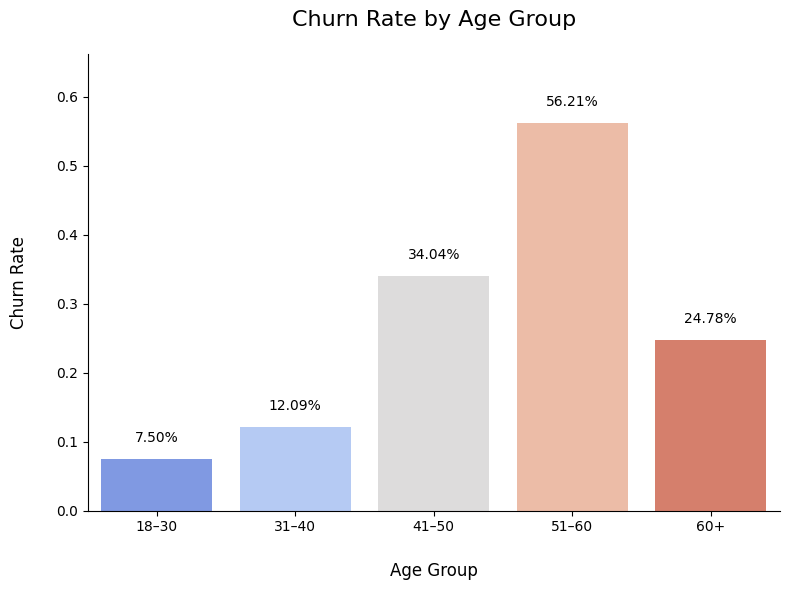

In [159]:
# Create Age bins with meaningful labels
age_bins = [18, 30, 40, 50, 60, 100]
age_labels = ['18–30', '31–40', '41–50', '51–60', '60+']
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=True)

# Calculate churn rate per age group
age_churn = df.groupby('Age_Group', observed=False)['Exited'].mean().reset_index()
age_churn.rename(columns={'Exited': 'Churn Rate'}, inplace=True)
age_churn['Churn Rate'] = age_churn['Churn Rate'].round(4)

# Plot churn rate by age group
plt.figure(figsize=(8, 6))
sns.barplot(data=age_churn, x='Age_Group', y='Churn Rate', palette='coolwarm', hue='Age_Group', legend=False)

# Titles and labels with better font sizes
plt.title('Churn Rate by Age Group', fontsize=16, pad=20)
plt.xlabel('Age Group', fontsize=12, labelpad=20)
plt.ylabel('Churn Rate', fontsize=12, labelpad=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set y-axis limit with a bit of padding
plt.ylim(0, age_churn['Churn Rate'].max() + 0.1)


# Annotate each bar with the churn rate percentage
for idx, row in age_churn.iterrows():
    plt.text(x=idx, y=row['Churn Rate'] + 0.02, s=f"{row['Churn Rate']:.2%}",
             ha='center', va='bottom', fontsize=10)

plt.grid(False)
plt.tight_layout()
plt.show()

# **Interpretation of Churn Rate by Age Group**

The churn rate shows a clear variation across different age groups, indicating that age is a strong factor influencing customer retention. The youngest group, aged **18–30**, has the lowest churn rate at **7.5%**, suggesting that younger customers tend to stay with the bank more consistently. The churn rate gradually increases in the **31–40** age group to **12.09%**.

A sharp rise in churn is observed among middle-aged customers, with the **41–50** group experiencing a churn rate of **34.04%**, and the **51–60** group reaching the highest churn rate at **56.21%**—more than half of the customers in this age range are leaving. Interestingly, the churn rate decreases somewhat in the **60+** group to **24.78%**, but remains significantly higher than the youngest segments.

This trend suggests that middle-aged customers, particularly those between 41 and 60, are most likely to exit, highlighting a key demographic for targeted retention efforts.
